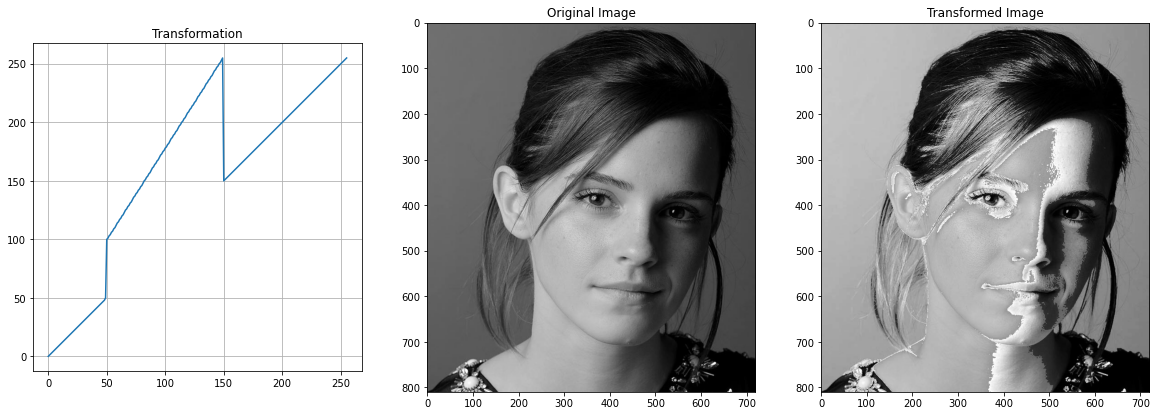

In [80]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

old = cv.imread(r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert old is not None

t1=np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(t)
ax[0].set_title("Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(t) == 256
g = cv.LUT(old,t)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()


Question 2a - White matter

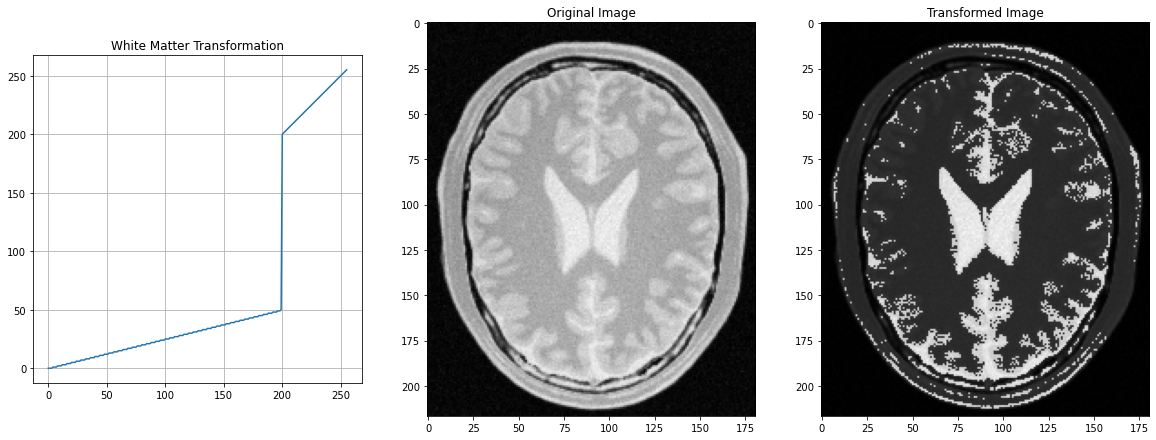

In [69]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

old = cv.imread(r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert old is not None

tw_1=np.linspace(0,50,200)
tw_2=np.linspace(200,255,56)
#tw_3=np.linspace(150,255,106)

tw = np.concatenate((tw_1,tw_2),axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(tw)
ax[0].set_title("White Matter Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(tw) == 256
g = cv.LUT(old,tw)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()



Question 2b - Black Matter

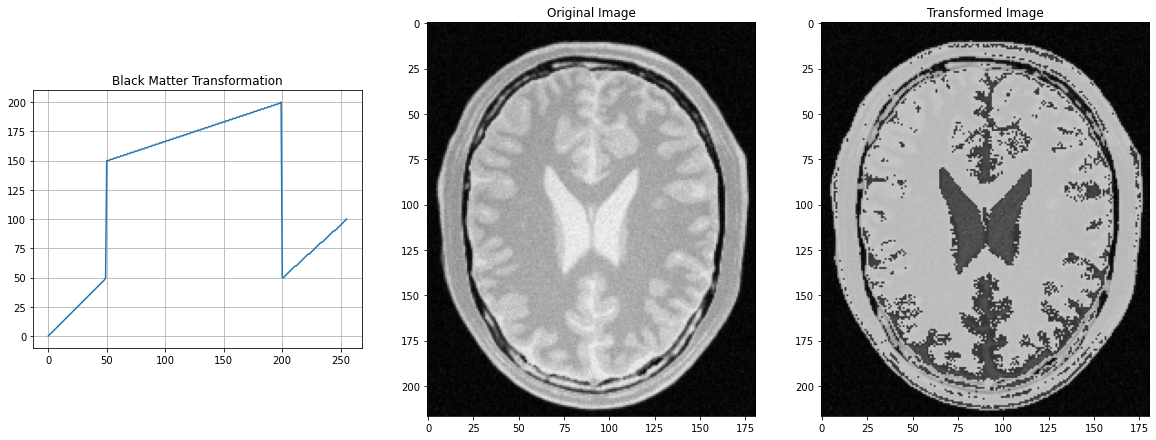

In [88]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

old = cv.imread(r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert old is not None

tb_1=np.linspace(0,50,50)
tb_2=np.linspace(150,200,150)
tb_3=np.linspace(50,100,56)

tb = np.concatenate((tb_1,tb_2,tb_3),axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(tb)
ax[0].set_title("Black Matter Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(tb) == 256
g = cv.LUT(old,tb)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()

Question 3a - Gamma correction

Question 4

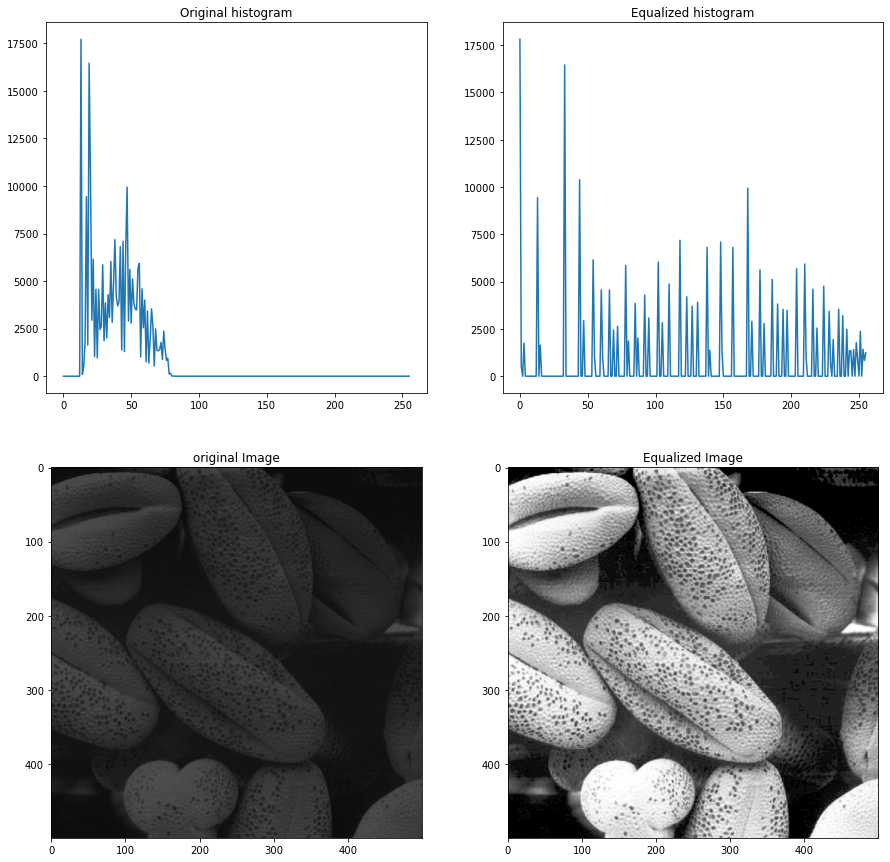

In [100]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
f = cv . imread ( r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\shells.png", cv . IMREAD_GRAYSCALE )
assert f is not None
hist_f = cv.calcHist([f],[0],None,[256],[0,256])
g=cv.equalizeHist(f)
hist_g = cv.calcHist([g],[0],None,[256],[0,256])

fig,ax=plt.subplots(2,2,figsize=(15,15))
ax[0][0].plot(hist_f)
ax[0][0].set_title("Original histogram")
ax[0][1].plot(hist_g)
ax[0][1].set_title("Equalized histogram")

fplot = cv.cvtColor(f, cv.COLOR_BGR2RGB)
#fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[1][0].imshow(fplot)
ax[1][0].set_title("original Image")


gplot = cv.cvtColor(g, cv.COLOR_BGR2RGB)
ax[1][1].imshow(gplot)
ax[1][1].set_title("Equalized Image")
plt.show()